# Wiring diagrams in Graphviz

Catlab can draw wiring diagrams using the `dot` program in [Graphviz](https://www.graphviz.org/). This feature requires that Graphviz be installed, but does not require any extra packages.

In [1]:
using Catlab.Graphics

### Symmetric monoidal category

In [2]:
using Catlab.Doctrines

A, B = Ob(FreeSymmetricMonoidalCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A)
h = Hom(:h, otimes(A,B), otimes(A,B));

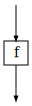

In [3]:
to_graphviz(f)

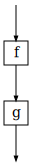

In [4]:
to_graphviz(compose(f,g))

In the next example, notice how Graphviz automatically "untwists" the double braiding to minimize edge crossings.

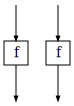

In [5]:
to_graphviz(compose(braid(A,A), otimes(f,f), braid(B,B)))

Here is a larger composite morphism.

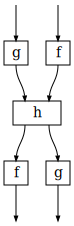

In [6]:
to_graphviz(compose(otimes(g,f), h, otimes(f,g)))

We can also tell Graphviz to lay out the diagrams in the horizontal (left-to-right) direction.

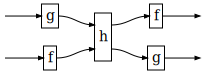

In [7]:
to_graphviz(compose(otimes(g,f), h, otimes(f,g)), direction=:horizontal)

### Biproduct category

In [8]:
A, B = Ob(FreeBiproductCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A);

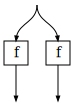

In [9]:
to_graphviz(compose(mcopy(A), otimes(f,f)))

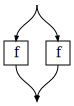

In [10]:
to_graphviz(compose(mcopy(A), otimes(f,f), mmerge(B)))